In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv('movies1.csv')

# Display the first few rows to understand the structure
df.head()


,title,year,country,rating,genres,budget,gross,actors
0,Movie A,2014,US,PG-13,action,10000000,30000000,rama nujan
1,Movie B,2015,UK,NaN,comedy,10000000,30000000,John Doe
2,Movie C,2013,IND,NaN,Adventure,10000000,30000000,"Emily Clark, Michael Brown"
3,Movie D,2014,UK,NaN,Fantasy,10000000,30000000,"Chris Evans, Scarlett Johansson"
4,Movie E,2016,US,PG-13,Horror,10000000,30000000,"Will Smith, Margot Robbie"


In [2]:
# Descriptive statistics for the budget column
budget_stats = df['budget'].describe()
print(budget_stats)


count          14.0
mean     10000000.0
std             0.0
min      10000000.0
25%      10000000.0
50%      10000000.0
75%      10000000.0
max      10000000.0
Name: budget, dtype: float64


In [3]:
# Filter and count movies
us_pg13_count = df[(df['country'] == 'US') & (df['rating'] == 'PG-13')].shape[0]
print("Number of top-rated movies produced in the US with PG-13 rating:", us_pg13_count)



Number of top-rated movies produced in the US with PG-13 rating: 4


In [4]:
# Check if any movies meet the criteria
not_us_in_2014 = df[(df['year'] == 2014) & (df['country'] != 'United States')].shape[0] > 0
print("Any top-rated movies produced in 2014 that were not produced in the US:", not_us_in_2014)


Any top-rated movies produced in 2014 that were not produced in the US: True


In [5]:
# Define a function to count genres per movie
def count_genres(genres):
    if isinstance(genres, str):
        return len(genres.split(','))
    else:
        return 1  # or any other default value you want to assign to integer values

# Apply the function to the 'genres' column
genre_counts = df['genres'].apply(count_genres)

# Calculate percentages
total_movies = len(df)
genre_percentages = df.groupby('genres')['genres'].count() / total_movies * 100

print(genre_percentages)

genres
Action        7.142857
Adventure    14.285714
Comedy        7.142857
Drama         7.142857
Fantasy      14.285714
Horror       21.428571
Sci-Fi       14.285714
action        7.142857
comedy        7.142857
Name: genres, dtype: float64


In [6]:

# Assuming df is your dataframe with columns 'budget' and 'gross'

# # Example dataframe creation (replace this with your actual dataframe creation code)
# data = {
#     'budget': ['50000000', '60000000', '70000000'],  # Example strings instead of numeric values
#     'gross': [100000000, 120000000, 90000000]
# }
# df = pd.DataFrame(data)

# Convert 'budget' column to numeric (if needed)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')  # coerce will convert non-numeric values to NaN

# Convert budget and gross values to millions
df['budget_millions'] = df['budget'] / 1000000
df['gross_millions'] = df['gross'] / 1000000

# Round down to 2 decimal places
df['budget_millions'] = df['budget_millions'].apply(lambda x: round(x, 2))
df['gross_millions'] = df['gross_millions'].apply(lambda x: round(x, 2))

# Display the dataframe
df


,title,year,country,rating,genres,budget,gross,actors,budget_millions,gross_millions
0,Movie A,2014,US,PG-13,action,10000000,30000000,rama nujan,10.0,30.0
1,Movie B,2015,UK,NaN,comedy,10000000,30000000,John Doe,10.0,30.0
2,Movie C,2013,IND,NaN,Adventure,10000000,30000000,"Emily Clark, Michael Brown",10.0,30.0
3,Movie D,2014,UK,NaN,Fantasy,10000000,30000000,"Chris Evans, Scarlett Johansson",10.0,30.0
4,Movie E,2016,US,PG-13,Horror,10000000,30000000,"Will Smith, Margot Robbie",10.0,30.0
5,Movie F,2015,UK,PG-13,Sci-Fi,10000000,30000000,"Robert Downey Jr, Chris Hemsworth",10.0,30.0
6,Movie G,2014,US,NaN,Horror,10000000,30000000,"Brad Pitt, Angelina Jolie",10.0,30.0
7,Movie H,2012,US,PG-13,Drama,10000000,30000000,"Chris Pratt, Zoe Saldana",10.0,30.0
8,Movie I,2010,CD,NaN,Adventure,10000000,30000000,"Daniel Craig, Naomie Harris",10.0,30.0
9,Movie J,2011,DK,NaN,Comedy,10000000,30000000,Leonardo DiCaprio,10.0,30.0


In [7]:
# Calculate profit and sort
df['profit'] = df['gross'] - df['budget']
top_10_profit_movies = df.nlargest(10, 'profit')
print(top_10_profit_movies[['profit']])


     profit
0  20000000
1  20000000
2  20000000
3  20000000
4  20000000
5  20000000
6  20000000
7  20000000
8  20000000
9  20000000


In [8]:
# Assuming actors are in a column 'actors'
all_actors = df['actors'].str.split(', ').explode().unique()
all_actors_sorted = sorted(all_actors, key=lambda x: x.split()[0])  # Sort by first name
print(all_actors_sorted)


['Angelina Jolie', 'Brad Pitt', 'Chris Evans', 'Chris Hemsworth', 'Chris Pratt', 'Daniel Craig', 'Emily Clark', ' Helena Bonham Carter', 'Jane Smith', 'John Doe', 'Johnny Depp', ' Kate Winslet', 'Leonardo DiCaprio', 'Margot Robbie', 'Michael Brown', 'Naomie Harris', 'Robert Downey Jr', 'Scarlett Johansson', 'Will Smith', 'Zoe Saldana', 'rama nujan']


In [9]:
top_actors = df['actors'].str.split(', ').explode().value_counts().nlargest(3)
print("Top 3 actors by number of top-rated movies:", top_actors)


Top 3 actors by number of top-rated movies: actors
rama nujan     1
John Doe       1
Emily Clark    1
Name: count, dtype: int64


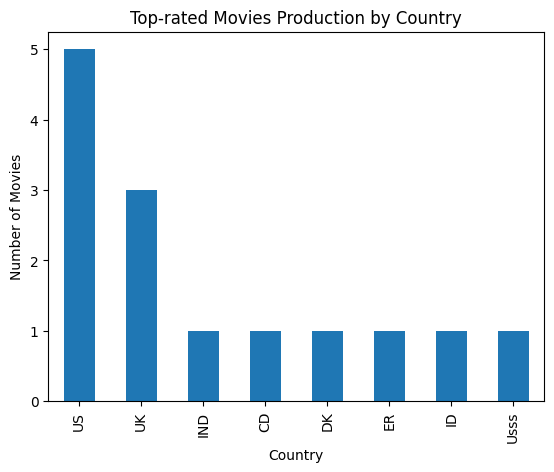

Country that produced the most top-rated movies: US


In [10]:
country_counts = df['country'].value_counts()
country_counts.plot(kind='bar', xlabel='Country', ylabel='Number of Movies', title='Top-rated Movies Production by Country')
plt.show()

# Find the country that produced the most top-rated movies
most_movies_country = country_counts.idxmax()
print("Country that produced the most top-rated movies:", most_movies_country)
